In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import RocCurveDisplay, f1_score

According to the VETA results three instruments were selected:
1. Pangolin
2. SpliceAI
4. SPiP

## Threshold selection

To select optimal thresholds we analize two datasets that contain:
- all 103 variants
- 54 variants that were experimantally confirmed

In [2]:
res_54 = pd.read_csv('final/54/veta_output/tools_benchmark/all_types/results_tsv/preds_all_types_all_scores.tsv', 
                     sep='\t')

In [3]:
res_54.head()

,chr,pos,ref,alt,SYMBOL,index,chr.1,pos.1,ref.1,alt.1,...,Pangolin,SQUIRLS,SpliceAI,SPiP,MaxEntScan,location,intron_bin,intron_offset,which_ss,outcome
0,1,68435602,T,G,RPE65,1_68435602_ENST00000262340.6:c.1128+2585A>C_G,1,68435602,T,G,...,0.00,0.0071,0.00,0.000,0.091,intronic,1000+,2585.0,unclear,Benign
1,1,93997549,G,A,ABCA4,1_93997549_ENST00000370225.4:c.6729+312C>T_A,1,93997549,G,A,...,0.00,0.0084,0.00,0.000,1.635,intronic,201-500,312.0,donor,Benign
2,1,94001452,C,T,ABCA4,1_94001452_ENST00000370225.4:c.6283-347G>A_T,1,94001452,C,T,...,0.00,0.0062,0.00,0.000,0.915,intronic,201-500,347.0,acceptor,Benign
3,1,94002381,C,T,ABCA4,1_94002381_ENST00000370225.4:c.6148-389G>A_T,1,94002381,C,T,...,0.03,0.0060,0.02,0.002,0.131,intronic,201-500,389.0,acceptor,Benign
4,1,94002484,A,G,ABCA4,1_94002484_ENST00000370225.4:c.6148-492T>C_G,1,94002484,A,G,...,0.13,0.0063,0.14,0.000,0.432,intronic,201-500,492.0,acceptor,Benign


In [4]:
res_103 = pd.read_csv('final/103/veta_output/tools_benchmark/all_types/results_tsv/preds_all_types_all_scores.tsv', 
                     sep='\t')

In [5]:
res_103.head()

,chr,pos,ref,alt,SYMBOL,index,chr.1,pos.1,ref.1,alt.1,...,Pangolin,SQUIRLS,SpliceAI,SPiP,MaxEntScan,location,intron_bin,intron_offset,which_ss,outcome
0,1,68435602,T,G,RPE65,1_68435602_ENST00000262340.6:c.1128+2585A>C_G,1,68435602,T,G,...,0.0,0.0071,0.0,0.000,0.091,intronic,1000+,2585,unclear,Benign
1,1,68446426,A,C,RPE65,1_68446426_ENST00000262340.6:c.245+284T>G_C,1,68446426,A,C,...,0.0,0.0072,0.0,0.000,1.272,intronic,201-500,284,donor,Benign
2,1,68446467,G,A,RPE65,1_68446467_ENST00000262340.6:c.245+243C>T_A,1,68446467,G,A,...,0.0,0.0089,0.0,0.006,0.856,intronic,201-500,243,donor,Benign
3,1,68448987,A,G,RPE65,1_68448987_ENST00000262340.6:c.12-281T>C_G,1,68448987,A,G,...,0.0,0.0060,0.0,0.000,0.175,intronic,201-500,281,acceptor,Benign
4,1,93997549,G,A,ABCA4,1_93997549_ENST00000370225.4:c.6729+312C>T_A,1,93997549,G,A,...,0.0,0.0084,0.0,0.000,1.635,intronic,201-500,312,donor,Benign


In [6]:
res_54.columns

Index(['chr', 'pos', 'ref', 'alt', 'SYMBOL', 'index', 'chr.1', 'pos.1',
       'ref.1', 'alt.1', 'id', 'type', 'subtype', 'HGVSc', 'SYMBOL.1',
       'Consequence', 'CADD_v1.5', 'CI-SpliceAI', 'PDIVAS', 'Pangolin',
       'SQUIRLS', 'SpliceAI', 'SPiP', 'MaxEntScan', 'location', 'intron_bin',
       'intron_offset', 'which_ss', 'outcome'],
      dtype='object')

Select necessary columns

In [7]:
res_54 = res_54[['chr', 'pos', 'ref', 'alt', 'SYMBOL', 'HGVSc', 'Pangolin', 'SpliceAI', 'SPiP', 'outcome']]
res_103 = res_103[['chr', 'pos', 'ref', 'alt', 'SYMBOL', 'HGVSc', 'Pangolin', 'SpliceAI', 'SPiP', 'outcome']]

While exploring VETA results we detected that benign variant scores are less than conventional thresholds

Analyze them manually

In [8]:
benign_res_54 = res_54[res_54['outcome'] == 'Benign']
benign_res_103 = res_103[res_103['outcome'] == 'Benign']

- Pangolin

In [9]:
benign_res_103.nlargest(5, 'Pangolin')['Pangolin']

10    0.13
74    0.10
9     0.03
35    0.03
50    0.02
Name: Pangolin, dtype: float64

- SpliceAI

In [10]:
benign_res_103.nlargest(5, 'SpliceAI')['SpliceAI']

10    0.14
74    0.08
5     0.02
9     0.02
31    0.02
Name: SpliceAI, dtype: float64

- SPiP

In [11]:
benign_res_103.nlargest(5, 'SPiP')['SPiP']

29    0.072
42    0.012
21    0.010
12    0.008
2     0.006
Name: SPiP, dtype: float64

Two datasets have identical higher scores for benign variants.

**Determine the upper limit of benign variants:**
- Pangolin: 0.14
- SpliceAI: 0.15
- SPiP: 0.08

Change predictions according to this threshold

In [12]:
res_54.loc[res_54['outcome'] == 'Benign', 'outcome'] = 0
res_54.loc[res_54['outcome'] == 'Pathogenic', 'outcome'] = 1

res_103.loc[res_103['outcome'] == 'Benign', 'outcome'] = 0
res_103.loc[res_103['outcome'] == 'Pathogenic', 'outcome'] = 1

In [13]:
res_54['outcome'] = pd.to_numeric(res_54['outcome'])
res_103['outcome'] = pd.to_numeric(res_103['outcome'])

In [14]:
res_54['Pangolin_pred'] = 0 
res_54['SpliceAI_pred'] = 0 
res_54['SPiP_pred'] = 0

res_103['Pangolin_pred'] = 0 
res_103['SpliceAI_pred'] = 0 
res_103['SPiP_pred'] = 0

In [15]:
res_54.loc[res_54['Pangolin'] > 0.14, 'Pangolin_pred'] = 1
res_54.loc[res_54['SpliceAI'] > 0.15, 'SpliceAI_pred'] = 1
res_54.loc[res_54['SPiP'] > 0.08, 'SPiP_pred'] = 1

res_103.loc[res_103['Pangolin'] > 0.14, 'Pangolin_pred'] = 1
res_103.loc[res_103['SpliceAI'] > 0.15, 'SpliceAI_pred'] = 1
res_103.loc[res_103['SPiP'] > 0.08, 'SPiP_pred'] = 1

Analyze metrics

In [16]:
print('The f1 score in the dataset with 54 variants')

pang_f1_score_54 = f1_score(res_54['outcome'], res_54['Pangolin_pred'])
print(f'Pangolin: {pang_f1_score_54}')

sai_f1_score_54 = f1_score(res_54['outcome'], res_54['SpliceAI_pred'])
print(f'SpliceAI: {sai_f1_score_54}')

spip_f1_score_54 = f1_score(res_54['outcome'], res_54['SPiP_pred'])
print(f'SPiP: {spip_f1_score_54}')

print('')

print('The f1 score in the dataset with 103 variants')

pang_f1_score_103 = f1_score(res_103['outcome'], res_103['Pangolin_pred'])
print(f'Pangolin: {pang_f1_score_103}')

sai_f1_score_103 = f1_score(res_103['outcome'], res_103['SpliceAI_pred'])
print(f'SpliceAI: {sai_f1_score_103}')

spip_f1_score_103 = f1_score(res_103['outcome'], res_103['SPiP_pred'])
print(f'SPiP: {spip_f1_score_103}')

The f1 score in the dataset with 54 variants
Pangolin: 0.4117647058823529
SpliceAI: 0.36363636363636365
SPiP: 0.13793103448275862

The f1 score in the dataset with 103 variants
Pangolin: 0.6962025316455697
SpliceAI: 0.6623376623376623
SPiP: 0.3252032520325203


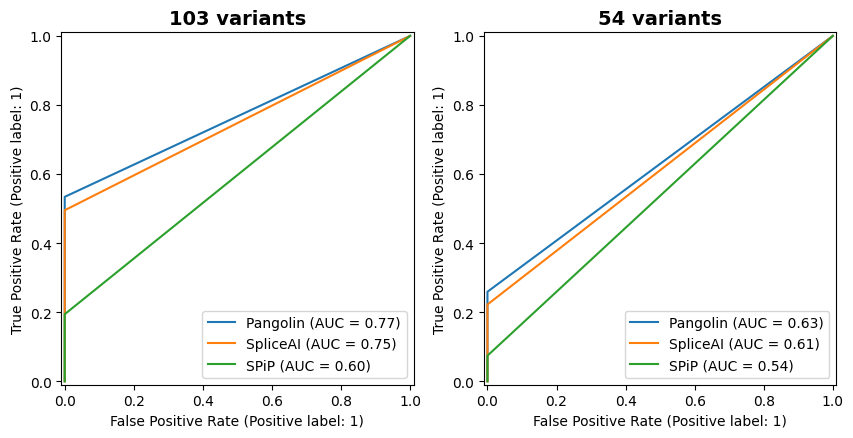

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

RocCurveDisplay.from_predictions(res_103['outcome'], res_103['Pangolin_pred'], ax=axes[0], name='Pangolin')
RocCurveDisplay.from_predictions(res_103['outcome'], res_103['SpliceAI_pred'],ax=axes[0], name='SpliceAI')
RocCurveDisplay.from_predictions(res_103['outcome'], res_103['SPiP_pred'],ax=axes[0], name='SPiP')
axes[0].set_title("103 variants", size=14, weight='bold')

RocCurveDisplay.from_predictions(np.array(res_54['outcome']), np.array(res_54['Pangolin_pred']), ax=axes[1], name='Pangolin')
RocCurveDisplay.from_predictions(res_54['outcome'], res_54['SpliceAI_pred'],ax=axes[1], name='SpliceAI')
RocCurveDisplay.from_predictions(res_54['outcome'], res_54['SPiP_pred'],ax=axes[1], name='SPiP')
axes[1].set_title("54 variants", size=14, weight='bold');

**Conclusion**

With decreasing the thresholds we improve metrics not for all 103 variants, but for experimantal 54 variants. 

Some of the benign scores could be considered as outliers. To improve recall сut off this values.

**Threshold without outliers:**

- Pangolin: 0.05
- SpliceAI: 0.05
- SPiP: 0.015

In [18]:
res_54['Pangolin_low_pred'] = 0 
res_54['SpliceAI_low_pred'] = 0 
res_54['SPiP_low_pred'] = 0

res_103['Pangolin_low_pred'] = 0 
res_103['SpliceAI_low_pred'] = 0 
res_103['SPiP_low_pred'] = 0

In [19]:
res_54.loc[res_54['Pangolin'] > 0.05, 'Pangolin_low_pred'] = 1
res_54.loc[res_54['SpliceAI'] > 0.05, 'SpliceAI_low_pred'] = 1
res_54.loc[res_54['SPiP'] > 0.015, 'SPiP_low_pred'] = 1

res_103.loc[res_103['Pangolin'] > 0.05, 'Pangolin_low_pred'] = 1
res_103.loc[res_103['SpliceAI'] > 0.05, 'SpliceAI_low_pred'] = 1
res_103.loc[res_103['SPiP'] > 0.015, 'SPiP_low_pred'] = 1

Analyze metrics

In [22]:
print('The f1 score in the dataset with 54 variants')

pang_f1_score_54 = f1_score(res_54['outcome'], res_54['Pangolin_low_pred'])
print(f'Pangolin: {pang_f1_score_54}')

sai_f1_score_54 = f1_score(res_54['outcome'], res_54['SpliceAI_low_pred'])
print(f'SpliceAI: {sai_f1_score_54}')

spip_f1_score_54 = f1_score(res_54['outcome'], res_54['SPiP_low_pred'])
print(f'SPiP: {spip_f1_score_54}')

print('')

print('The f1 score in the dataset with 103 variants')

pang_f1_score_103 = f1_score(res_103['outcome'], res_103['Pangolin_low_pred'])
print(f'Pangolin: {pang_f1_score_103}')

sai_f1_score_103 = f1_score(res_103['outcome'], res_103['SpliceAI_low_pred'])
print(f'SpliceAI: {sai_f1_score_103}')

spip_f1_score_103 = f1_score(res_103['outcome'], res_103['SPiP_low_pred'])
print(f'SPiP: {spip_f1_score_103}')

The f1 score in the dataset with 54 variants
Pangolin: 0.4657534246575342
SpliceAI: 0.4864864864864865
SPiP: 0.3076923076923077

The f1 score in the dataset with 103 variants
Pangolin: 0.7195121951219512
SpliceAI: 0.7195121951219512
SPiP: 0.5655172413793104


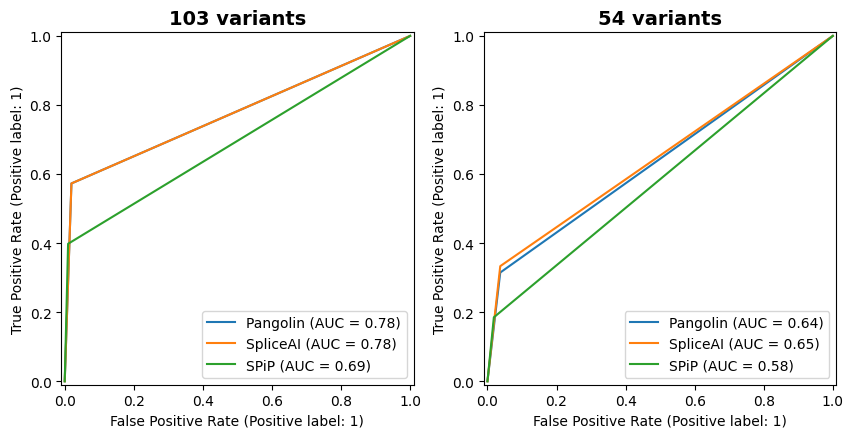

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

RocCurveDisplay.from_predictions(res_103['outcome'], res_103['Pangolin_low_pred'], ax=axes[0], name='Pangolin')
RocCurveDisplay.from_predictions(res_103['outcome'], res_103['SpliceAI_low_pred'],ax=axes[0], name='SpliceAI')
RocCurveDisplay.from_predictions(res_103['outcome'], res_103['SPiP_low_pred'],ax=axes[0], name='SPiP')
axes[0].set_title("103 variants", size=14, weight='bold')

RocCurveDisplay.from_predictions(np.array(res_54['outcome']), np.array(res_54['Pangolin_low_pred']), ax=axes[1], name='Pangolin')
RocCurveDisplay.from_predictions(res_54['outcome'], res_54['SpliceAI_low_pred'],ax=axes[1], name='SpliceAI')
RocCurveDisplay.from_predictions(res_54['outcome'], res_54['SPiP_low_pred'],ax=axes[1], name='SPiP')
axes[1].set_title("54 variants", size=14, weight='bold');

**Conclusion**

Such thresholds improve the shown metrics, especially f1 score.

Therefore, rerun VETA with selected thresholds

## Exploring influnce of distances from splice junctions on predictions

In [23]:
res_103['distance'] = res_103['HGVSc'].str.split(r'[AGCT]', expand=True, regex=True)[1].str.split('[-\+]', expand=True)[1]

In [26]:
res_103.loc[150, 'distance'] = 5111

In [27]:
res_103.loc[177, 'distance'] = 563

In [28]:
res_103.loc[182, 'distance'] = 73718

In [29]:
res_103.loc[185, 'distance'] = 7213

In [30]:
res_103['distance'] = pd.to_numeric(res_103['distance'])

### Pathogenic variants

In [31]:
res_103_pathogenic = res_103[res_103['outcome'] == 1]

In [32]:
res_103_pathogenic_short = res_103_pathogenic[res_103_pathogenic['distance'] < 4000]

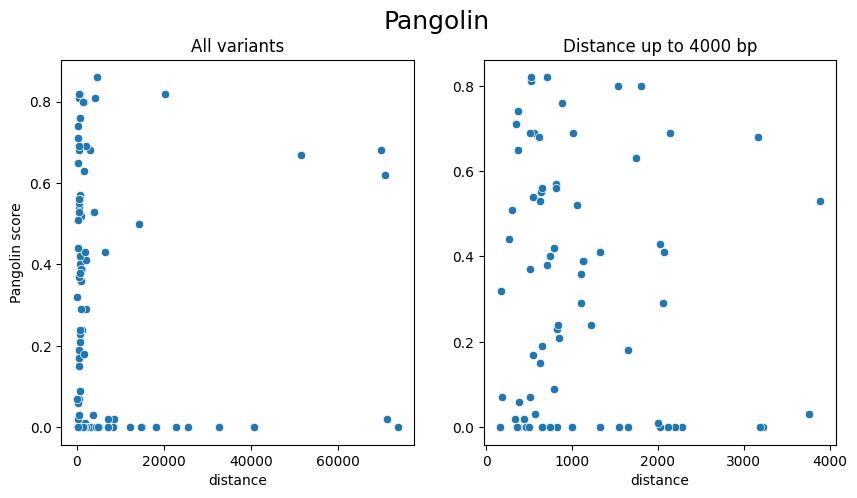

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('Pangolin', fontsize=18)
sns.scatterplot(y=res_103_pathogenic.Pangolin, x=res_103_pathogenic.distance, ax=axes[0])
axes[0].set_title('All variants')
axes[0].set_ylabel('Pangolin score')

sns.scatterplot(y=res_103_pathogenic_short.Pangolin, x=res_103_pathogenic_short.distance, ax=axes[1])
axes[1].set_title('Distance up to 4000 bp')
axes[1].set_ylabel('');

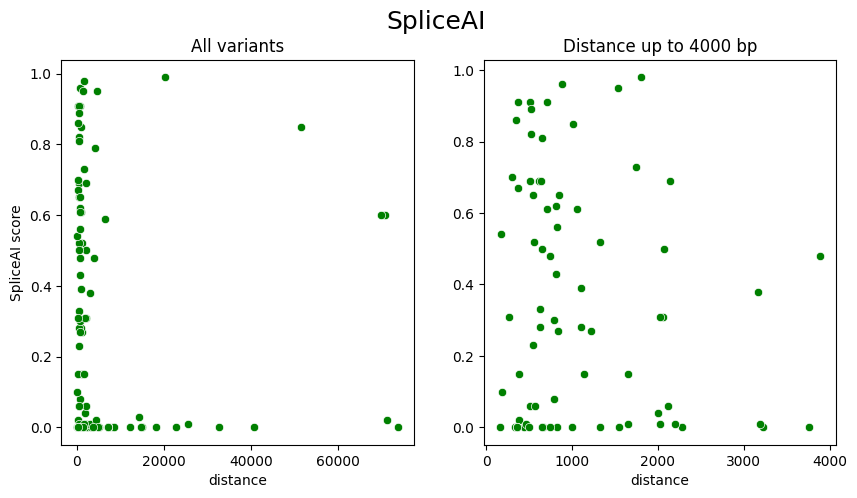

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('SpliceAI', fontsize=18)
sns.scatterplot(y=res_103_pathogenic.SpliceAI, x=res_103_pathogenic.distance, color='g', ax=axes[0])
axes[0].set_title('All variants')
axes[0].set_ylabel('SpliceAI score')

sns.scatterplot(y=res_103_pathogenic_short.SpliceAI, x=res_103_pathogenic_short.distance, color='g', ax=axes[1])
axes[1].set_title('Distance up to 4000 bp')
axes[1].set_ylabel('');

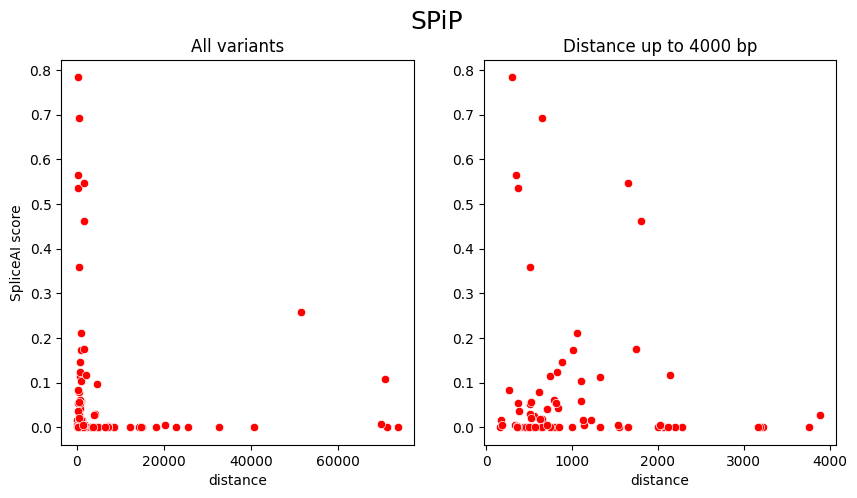

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.suptitle('SPiP', fontsize=18)
sns.scatterplot(y=res_103_pathogenic.SPiP, x=res_103_pathogenic.distance, color='r', ax=axes[0])
axes[0].set_title('All variants')
axes[0].set_ylabel('SpliceAI score')

sns.scatterplot(y=res_103_pathogenic_short.SPiP, x=res_103_pathogenic_short.distance, color='r', ax=axes[1])
axes[1].set_title('Distance up to 4000 bp')
axes[1].set_ylabel('');

We can see tendency that scores become lower as the distance increase especially in case of SPiP.

But, there are no strong corelation in case of each instrument